## In this notebook we are going to see how much time it takes to compute all the features for a single waveform of one minute in the duration

In [1]:
import obspy 
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm
import os
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
#from tsfresh import extract_features
#from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
import time
import tsfel
import warnings
warnings.filterwarnings("ignore")


from obspy.clients.fdsn import Client
client = Client('IRIS')
from obspy.geodetics.base import gps2dist_azimuth
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")

import sys
sys.path.append('/home/ak287/PNW_ML_Classification/notebooks/')

import seis_feature

In [2]:
station = 'SCM'
st = obspy.read(glob('../Data/icequake_waveforms/*'+station+'*')[0]).select(channel = '*HZ')
st.detrend()

1 Trace(s) in Stream:
AK.SCM..BHZ | 2022-03-11T21:58:52.008400Z - 2022-03-11T22:03:51.988400Z | 50.0 Hz, 15000 samples

In [3]:
x = 1
starttime = st[0].stats.starttime
endtime  = starttime + x*60
d = st[0].trim(starttime, endtime)


network = d.stats.network
station = d.stats.station
location = d.stats.location
channel = d.stats.channel
starttime = d.stats.starttime
endtime = d.stats.endtime
inv = client.get_stations(network = network, station= station, location= location, channel=channel,
         starttime=starttime, endtime=endtime, level="response")

d.remove_response(inventory= inv, output = "VEL")
d.filter(type='bandpass', freqmin= 0.5, freqmax= 25)

AK.SCM..BHZ | 2022-03-11T21:58:52.008400Z - 2022-03-11T21:59:52.008400Z | 50.0 Hz, 3001 samples

In [4]:
t = [0.5, 1, 2, 3, 4]

dur_time = []
for x in t:
        station = 'SCM'
        st = obspy.read(glob('../Data/icequake_waveforms/*'+station+'*')[0]).select(channel = '*HZ')
        st.detrend()



        starttime = st[0].stats.starttime
        endtime  = starttime + x*60
        d = st[0].trim(starttime, endtime)


        network = d.stats.network
        station = d.stats.station
        location = d.stats.location
        channel = d.stats.channel
        starttime = d.stats.starttime
        endtime = d.stats.endtime
        inv = client.get_stations(network = network, station= station, location= location, channel=channel,
                 starttime=starttime, endtime=endtime, level="response")

        d.remove_response(inventory= inv, output = "VEL")
        d.filter(type='bandpass', freqmin= 0.5, freqmax= 25)




        domains = ['statistical', 'temporal', 'spectral',None]

        dur = []
        for domain in domains:
            cfg_file = tsfel.get_features_by_domain(domain)
            start = time.time()
            tsfel.time_series_features_extractor(cfg_file, d.data, fs=50, 
                                                                            n_jobs = -1, verbose = 1)
            end = time.time()
            dur.append(end - start)

        
        start = time.time()
        abs(np.fft.fft(d.data))
        end = time.time()
        dur.append(end - start)
        
        

        tr = obspy.Trace(d.data)
        tr.stats.sampling_rate = 50
        start = time.time()
        df = seis_feature.compute_physical_features(tr = tr, envfilter = False)
        end = time.time()
        dur.append(end-start)
        
        
        dur_time.append(dur)

*** Feature extraction started ***
16


*** Feature extraction started ***
18


*** Feature extraction started ***
26


*** Feature extraction started ***
60


*** Feature extraction started ***
16


*** Feature extraction started ***
18


*** Feature extraction started ***
26


*** Feature extraction started ***
60


*** Feature extraction started ***
16


*** Feature extraction started ***
18


*** Feature extraction started ***
26


*** Feature extraction started ***
60


*** Feature extraction started ***
16


*** Feature extraction started ***
18


*** Feature extraction started ***
26


*** Feature extraction started ***
60


*** Feature extraction started ***
16


*** Feature extraction started ***
18


*** Feature extraction started ***
26


*** Feature extraction started ***
60


In [5]:
df

,Window_Length,RappMaxMean,RappMaxMedian,AsDec,KurtoSig,KurtoEnv,SkewSig,SkewEnv,CorPeakNumber,Energy1/3Cor,...,DistMaxMeanFreqDTF,DistMaxMedianFreqDTF,DistQ2Q1DFT,DistQ3Q2DFT,DistQ3Q1DFT,Peak_Envelope_Amplitude,Average_Envelope_Amplitude,Envelope_Area,Envelope_Velocity,Envelope_Rise_Time
0,240.0,8.765188,10.223638,0.132717,11.441693,30.39589,-0.038866,4.157156,5709.0,-6.701667e-11,...,1.490448e-14,1.526911e-14,3.773425,-1.029662,2.743763,9.481315e-07,1.081701e-07,0.000026,1.081275e-07,28.12


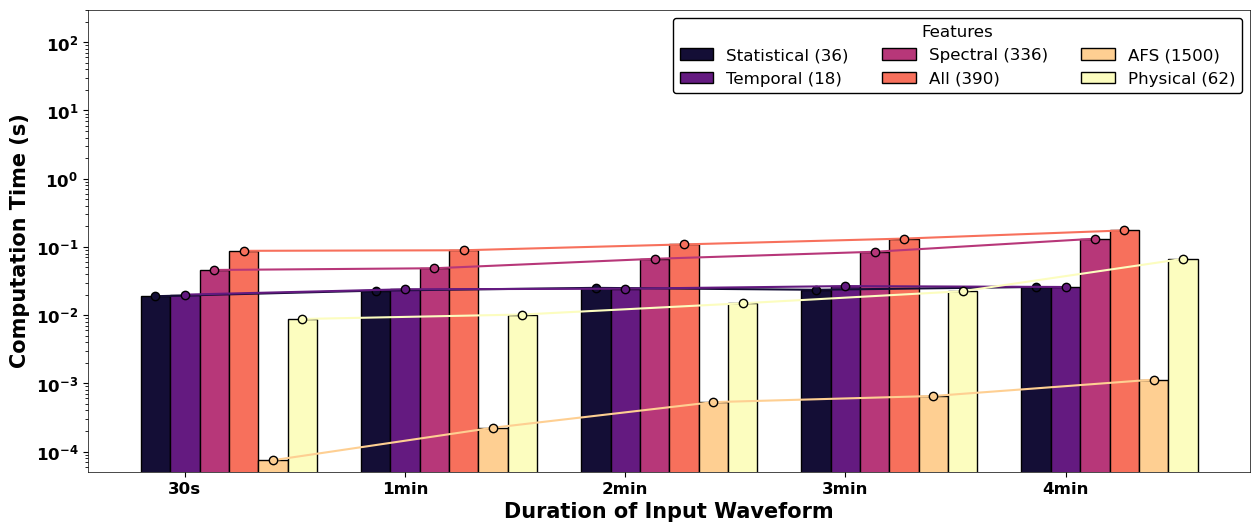

In [6]:
dur_time = np.array(dur_time)
a1 = dur_time[:,0]
a2 = dur_time[:,1]
a3 = dur_time[:,2]
a4 = dur_time[:,3]
a5 = dur_time[:,4]
a6 = dur_time[:,5]


plt.style.use('default')
plt.rcParams['axes.linewidth'] = 0.5
import matplotlib
cmap = matplotlib.cm.get_cmap('magma')

c1 = cmap(0.1)
c2 = cmap(0.3)
c3 = cmap(0.5)
c4 = cmap(0.7)
c5 = cmap(0.9)
c6 = cmap(1.0)



# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(15, 6), facecolor='white')
 



# Set position of bar on X axis
br1 = 1.5*np.arange(len(a1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Make the plot
plt.bar(br1, a1, color =c1, width = barWidth,
        label ='Statistical (36)',edgecolor='k')
plt.bar(br2, a2, color =c2, width = barWidth,
         label ='Temporal (18)',edgecolor='k')
plt.bar(br3, a3, color =c3, width = barWidth,
         label ='Spectral (336)',edgecolor='k')
plt.bar(br4, a4, color =c4, width = barWidth,
         label ='All (390)',edgecolor='k')
plt.bar(br5, a5, color =c5, width = barWidth,
         label ='AFS (1500)',edgecolor='k')
plt.bar(br6, a6, color =c6, width = barWidth,
         label ='Physical (62)',edgecolor='k')


v = np.vstack((a1,a2))
X = [br1, br2]
c= [c2,c5]
#for i in range(15):
#    plt.scatter(X[int(np.argmax(v[:,i]))][i], max(v[:,i])+0.5, c=c[int(np.argmax(v[:,i]))])



plt.plot(br1, a1, marker = 'o', color=c1, mec = 'k')
plt.plot(br2, a2, marker = 'o',color=c2, mec = 'k') 
plt.plot(br3, a3, marker = 'o',color=c3, mec = 'k')
plt.plot(br4, a4, marker = 'o', color=c4, mec = 'k')
plt.plot(br5, a5, marker = 'o', color=c5, mec = 'k')
plt.plot(br6, a6, marker = 'o', color=c6, mec = 'k')


# Adding Xticks
xlabels = ['30s', '1min', '2min','3min','4min']
plt.xlabel('Duration of Input Waveform', fontweight ='bold', fontsize = 15)
plt.ylabel('Computation Time (s)', fontweight ='bold', fontsize = 15)
plt.yticks(np.arange(0,100,20), fontweight = 'bold', fontsize=12)
plt.yscale('log')
plt.xticks([1.5*r + barWidth for r in range(len(a1))], xlabels,  fontsize= 12, fontweight='bold')
plt.ylim(0,300)
#plt.xlim(-1,23)
plt.legend(loc='upper right',ncol=3, facecolor='white', framealpha=1, edgecolor='black', fontsize=12, title ='Features', title_fontsize=12)
#plt.show()

#plt.savefig('Manuscript_Figures/Features_Performance_Comparison_averaged.eps')








In [7]:
dur_time[:,:7]

array([[  1.89290047e-02,   1.99711323e-02,   4.59327698e-02,
          8.76126289e-02,   7.46250153e-05,   8.78095627e-03],
       [  2.28667259e-02,   2.39295959e-02,   4.86545563e-02,
          8.93247128e-02,   2.23636627e-04,   1.02074146e-02],
       [  2.51030922e-02,   2.44083405e-02,   6.69620037e-02,
          1.08852148e-01,   5.30481339e-04,   1.49092674e-02],
       [  2.35309601e-02,   2.66506672e-02,   8.49015713e-02,
          1.32471561e-01,   6.52551651e-04,   2.24256516e-02],
       [  2.58743763e-02,   2.58545876e-02,   1.31876945e-01,
          1.74554586e-01,   1.13439560e-03,   6.68067932e-02]])

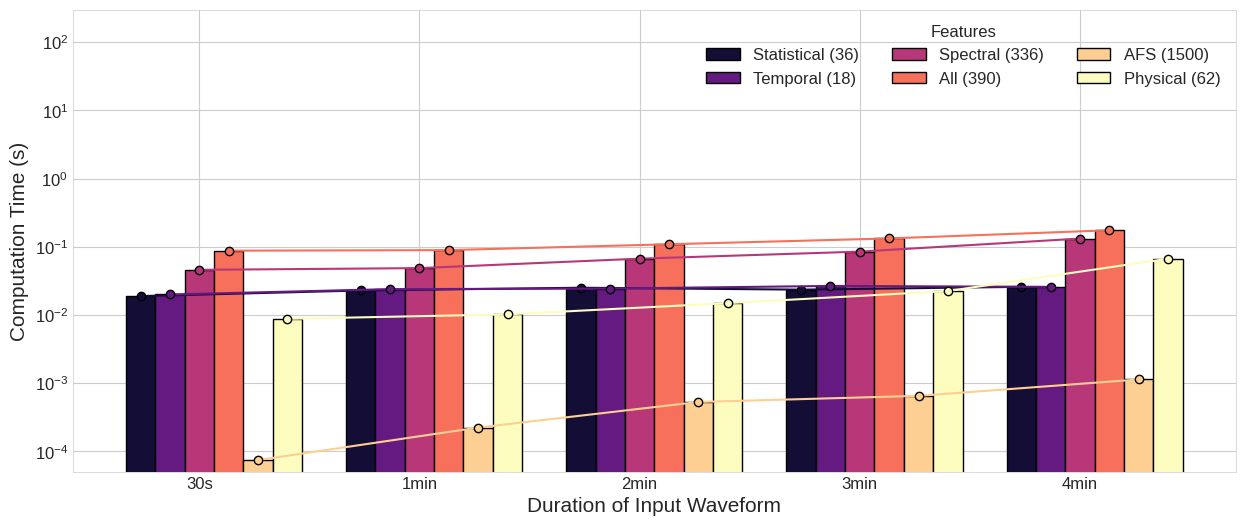

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


a1 = dur_time[:,0]
a2 = dur_time[:,1]
a3 = dur_time[:,2]
a4 = dur_time[:,3]
a5 = dur_time[:,4]
a6 = dur_time[:,5]

# Data
dur_time = np.array(dur_time)


# Plot settings
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.linewidth'] = 0.5
cmap = matplotlib.cm.get_cmap('magma')

colors = [cmap(0.1), cmap(0.3), cmap(0.5), cmap(0.7), cmap(0.9), cmap(1.0)]

# Figure
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

# Set position of bar on X axis
barWidth = 0.2
br = 1.5 * np.arange(len(a1))

# Make the plot
for i, (data, label, color) in enumerate(zip([a1, a2, a3, a4, a5, a6],
                                            ['Statistical (36)', 'Temporal (18)', 'Spectral (336)', 'All (390)', 'AFS (1500)', 'Physical (62)'],
                                            colors)):
    plt.bar(br + i * barWidth, data, color=color, width=barWidth, label=label, edgecolor='k')
    plt.plot(br + i * barWidth, data, marker='o', color=color, mec='k')

# Adding Xticks
xlabels = ['30s', '1min', '2min', '3min', '4min']
plt.xlabel('Duration of Input Waveform', fontsize=15)
plt.ylabel('Computation Time (s)', fontsize=15)
plt.yticks(np.arange(0, 100, 20), fontsize=12)
plt.yscale('log')
plt.xticks(br + 2 * barWidth, xlabels, fontsize=12)
plt.ylim(0, 300)

# Legend
plt.legend(loc='upper right', ncol=3, facecolor='white', framealpha=1, edgecolor='black', fontsize=12, title='Features', title_fontsize=12)

# Save or show the plot
# plt.savefig('Manuscript_Figures/Features_Performance_Comparison_averaged.eps')
plt.show()
